In [1]:
import numpy as np
from numpy import arange
from astropy.io import ascii
import astropy.units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt

In [2]:
RA = 10
DEC = 10
R = 0.1
V_lim = 18
Cat_len = 100

In [41]:
# My_Cat = Table()
# make astropy SkyCoord object
coord = SkyCoord(ra=RA * u.degree, dec=DEC * u.degree, frame='icrs')
# set search cone
radius = Angle(R * u.deg)
# set columns
V = Vizier(columns=['RAJ2000', 'DEJ2000',
                    '+_Gmag', 'Gmag', 'BPmag', 'pmRA', 'pmDE',
                    'RPmag', "_r", 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag',
                    'gmag', 'imag', 'rmag', 'ymag', 'zmag']) 
# set limit of rows, sort by distance default
V.ROW_LIMIT = Cat_len
catalog = ['I/355/gaiadr3', 'II/246/out', 'II/328/allwise', 'II/349/ps1']
# get data
Gaia_tab = V.query_region(coord, radius=radius, catalog=catalog)
# Gaia_tab = V.query_region(coord, radius=radius, catalog=['I/355/gaiadr3'])
print(Gaia_tab)
print(Gaia_tab[0])



TableList with 4 tables:
	'0:I/355/gaiadr3' with 8 column(s) and 93 row(s) 
	'1:II/246/out' with 6 column(s) and 53 row(s) 
	'2:II/328/allwise' with 12 column(s) and 100 row(s) 
	'3:II/349/ps1' with 8 column(s) and 100 row(s) 
   _r        RAJ2000         DEJ2000     ...    pmRA      pmDE     RPmag  
               deg             deg       ...  mas / yr  mas / yr    mag   
-------- --------------- --------------- ... --------- --------- ---------
0.095804  10.05945410301   9.92417556407 ...    -0.639    -1.452 20.217699
0.095195  10.06293726290   9.92785094164 ...    17.983    -7.447 18.300808
0.091522  10.07067225463   9.94065866833 ...    15.391    -2.484 18.442076
0.098387  10.00078581017   9.90167232089 ...    -1.502   -12.355 19.066639
0.099036  10.00124547914   9.90105059313 ...     4.487   -17.368 18.830719
0.086980   9.98918243757   9.91379048495 ...    -9.835   -24.239 18.487906
0.083878   9.98168856429   9.91815029454 ...    -3.857   -13.352 19.613125
0.094922   9.9320136115

In [21]:
np.save('all_cats', Gaia_tab)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [5]:
Gaia_tab = np.load('gaia_cat.npy')

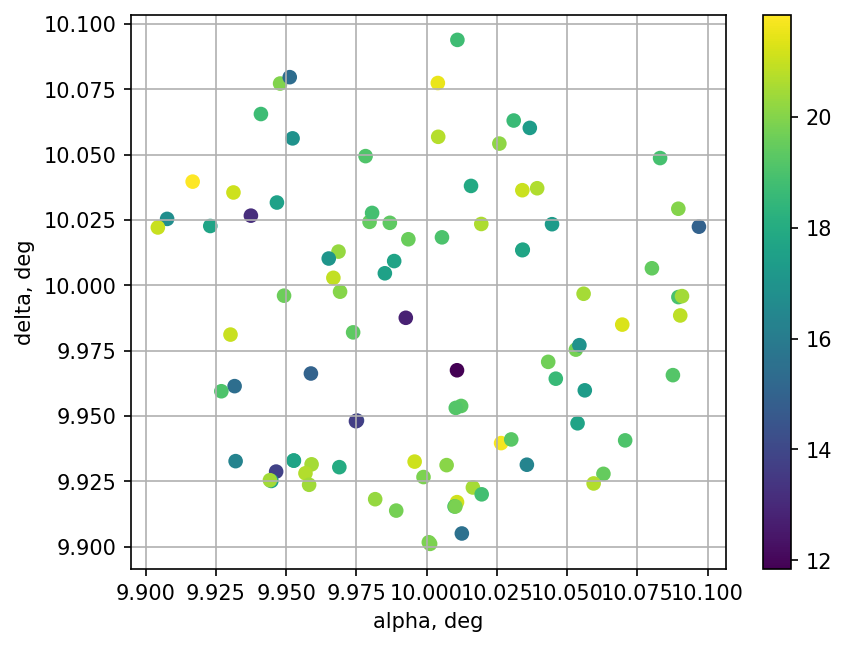

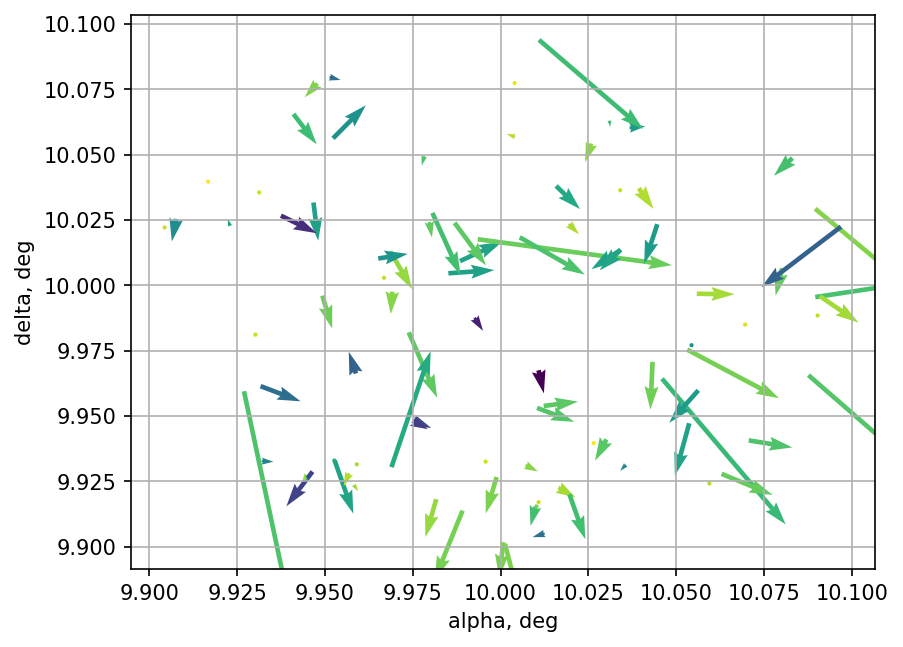

In [34]:
fig1, ax1 = plt.subplots(dpi=150)
ax1.set_xlabel(r"alpha, deg")
ax1.set_ylabel(r"delta, deg")
ax1.grid()

# colors = np.array([np.max(My_Cat['G']), np.min(My_Cat['G'])])
scatter = ax1.scatter(Gaia_tab['RAJ2000'], Gaia_tab['DEJ2000'], c=Gaia_tab['Gmag'], cmap='viridis')
fig1.colorbar(scatter)
plt.savefig(f"result_scatter.png")

fig2, ax2 = plt.subplots(dpi=150)
ax2.set_xlabel(r"alpha, deg")
ax2.set_ylabel(r"delta, deg")
ax2.grid()
ax2.quiver(Gaia_tab['RAJ2000'].filled(0), Gaia_tab['DEJ2000'].filled(0), Gaia_tab['pmRA'].filled(0), Gaia_tab['pmDE'].filled(0), Gaia_tab['Gmag'])
plt.savefig(f"result_quiver.png")


1. Выбрать 100 самых ярких звёзд для области, которую мы запрашивали из Gaia
2. Достать для этих звёзд их потоки в каталогах Gaia, 2MASS, MSX, WISE, PanStarrs в Янских
3. Построить для нескольких звёзд график зависимости потока от длины волны

Длину волн фильтров и формулы перевода в Янские доставать из сайтов каталогов 

In [52]:
mags = ('RAJ2000', 'DEJ2000', 'Gmag', 'BPmag',
        'RPmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag',
        'gmag', 'imag', 'rmag', 'ymag', 'zmag')
result_cat = Table(names=mags)
Tab_List = [Gaia_tab[0], Gaia_tab[1], Gaia_tab[2], Gaia_tab[3]]
for row in Tab_List[0]:
    for cat in Tab_List[1:]:
        for item in cat:
            if np.sqrt((row['RAJ2000']-item['RAJ2000'])**2+(row['DEJ2000']-item['DEJ2000'])**2)<1e-4:
                result_cat.add_row()
                for mag in mags:
                    try:
                        result_cat[-1][mag] = row[mag]
                        continue
                    except: 
                        # result_cat[-1][mag] = np.nan
                        pass
                    try:
                        result_cat[-1][mag] = item[mag]
                    except:
                        result_cat[-1][mag] = np.nan
result_cat
# np.save('result_cat', result_cat)

C:\Users\User\IdeaProjects\Telescopes\venv\lib\site-packages\astropy\table\column.py:1362: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488
10.00078581017,9.90167232089,19.844248,20.499269,19.066639,nan,nan,nan,nan,nan,nan,nan,20.6544,19.4012,19.7633,18.961,19.1617
10.00124547914,9.90105059313,19.890486,20.644917,18.830719,nan,nan,nan,nan,nan,nan,nan,21.2453,19.2052,20.1362,18.4687,18.7382
9.98918243757,9.91379048495,19.765535,21.287773,18.487906,16.64900016784668,15.857000350952148,15.690999984741211,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.98168856429,9.91815029454,20.255646,20.708618,19.613125,nan,nan,nan,nan,nan,nan,nan,20.7094,19.8586,20.2218,19.5659,19.7262
9.93201361159,9.93271197877,16.29969,16.734129,15.693999,14.961999893188477,14.656000137329102,14.538999557495117,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [53]:
np.save('result_cat.npy', result_cat)

In [13]:
result_cat = np.load('result_cat.npy')
result_cat = Table(result_cat)

In [5]:
# G BP RP J H Ks W1-W4 g r i z y
ZP = [3229, 3552, 2555, 1594, 1024, 666.7, 309.54, 171.79, 31.676, 8.3635, 3964.03, 3173.02, 2575.36, 2261.81, 2180.4]
wl = [622, 511, 777, 1235, 1662, 2159, 3368, 4618, 12082, 22194, 481, 617, 752, 866, 962]
mags = ('Gmag', 'BPmag', 'RPmag', 
        'Jmag', 'Hmag', 'Kmag', 
        'W1mag', 'W2mag', 'W3mag', 'W4mag',
        'gmag', 'imag', 'rmag', 'ymag', 'zmag')


In [16]:
for mag in mags:
    result_cat.add_column(col=np.nan, name=mag+'_WL')
    result_cat.add_column(col=np.nan, name=mag+'_Flux')

In [17]:
# result_cat = Table(result_cat)
result_cat

RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag,Gmag_WL,Gmag_Flux,BPmag_WL,BPmag_Flux,RPmag_WL,RPmag_Flux,Jmag_WL,Jmag_Flux,Hmag_WL,Hmag_Flux,Kmag_WL,Kmag_Flux,W1mag_WL,W1mag_Flux,W2mag_WL,W2mag_Flux,W3mag_WL,W3mag_Flux,W4mag_WL,W4mag_Flux,gmag_WL,gmag_Flux,imag_WL,imag_Flux,rmag_WL,rmag_Flux,ymag_WL,ymag_Flux,zmag_WL,zmag_Flux
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.00078581017,9.90167232089,19.844248,20.499269,19.066639,nan,nan,nan,nan,nan,nan,nan,20.6544,19.4012,19.7633,18.961,19.1617,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.00124547914,9.90105059313,19.890486,20.644917,18.830719,nan,nan,nan,nan,nan,nan,nan,21.2453,19.2052,20.1362,18.4687,18.7382,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.98918243757,9.91379048495,19.765535,21.287773,18.487906,16.64900016784668,15.857000350952148,15.690999984741211,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.98168856429,9.91815029454,20.255646,20.708618,19.613125,nan,nan,nan,nan,nan,nan,nan,20.7094,19.8586,20.2218,19.5659,19.7262,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.93201361159,9.93271197877,16.29969,16.734129,15.693999,14.961999893188477,14.656000137329102,14.538999557495117,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [18]:
for row in result_cat:
    for i, mag in enumerate(mags):
        row[mag+'_WL'] = wl[i]
        row[mag+'_Flux'] = ZP[i]*10**(-0.4*row[mag])
result_cat

RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag,Gmag_WL,Gmag_Flux,BPmag_WL,BPmag_Flux,RPmag_WL,RPmag_Flux,Jmag_WL,Jmag_Flux,Hmag_WL,Hmag_Flux,Kmag_WL,Kmag_Flux,W1mag_WL,W1mag_Flux,W2mag_WL,W2mag_Flux,W3mag_WL,W3mag_Flux,W4mag_WL,W4mag_Flux,gmag_WL,gmag_Flux,imag_WL,imag_Flux,rmag_WL,rmag_Flux,ymag_WL,ymag_Flux,zmag_WL,zmag_Flux
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264,622.0,1.7292000722886753e-05,511.0,1.6063025807195575e-05,777.0,2.090794285715824e-05,1235.0,nan,1662.0,nan,2159.0,nan,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,1.8259838521578072e-05,617.0,1.7557909635437183e-05,752.0,1.825735861004234e-05,866.0,2.3536187753178283e-05,962.0,1.3426912952109859e-05
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan,622.0,5.1717371615228484e-05,511.0,1.7232574198078977e-05,777.0,0.00012219901478432651,1235.0,0.0003230638738684143,1662.0,0.0004697859991829599,2159.0,0.0003560660385359609,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,nan,617.0,nan,752.0,nan,866.0,nan,962.0,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806,622.0,5.1717371615228484e-05,511.0,1.7232574198078977e-05,777.0,0.00012219901478432651,1235.0,nan,1662.0,nan,2159.0,nan,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,1.087469117760097e-05,617.0,9.834511885419429e-05,752.0,2.4614892647486783e-05,866.0,0.0001572157746176992,962.0,0.00011649201926304681
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488,622.0,7.848431009399715e-05,511.0,5.575535137313943e-05,777.0,0.00010729031107365659,1235.0,nan,1662.0,nan,2159.0,nan,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,5.966737508659809e-05,617.0,9.909068018370825e-05,752.0,6.35035415137169e-05,866.0,8.439877047619477e-05,962.0,7.568610804021373e-05
10.00078581017,9.90167232089,19.844248,20.499269,19.066639,nan,nan,nan,nan,nan,nan,nan,20.6544,19.4012,19.7633,18.961,19.1617,622.0,3.72708111769833e-05,511.0,2.2426699149693182e-05,777.0,6.0358064451393834e-05,1235.0,nan,1662.0,nan,2159.0,nan,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,2.1695863138723755e-05,617.0,5.5079857693944e-05,752.0,3.202712435227321e-05,866.0,5.8891975108826274e-05,962.0,4.719067325728897e-05
10.00124547914,9.90105059313,19.890486,20.644917,18.830719,nan,nan,nan,nan,nan,nan,nan,21.2453,19.2052,20.1362,18.4687,18.7382,622.0,3.571689072046126e-05,511.0,1.9611289787178926e-05,777.0,7.500726058855862e-05,1235.0,nan,1662.0,nan,2159.0,nan,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,1.2589744966546668e-05,617.0,6.597703728229542e-05,752.0,2.2717364483914627e-05,866.0,9.267788620584895e-05,962.0,6.97037548102684e-05
9.98918243757,9.91379048495,19.765535,21.287773,18.487906,16.64900016784668,15.857000350952148,15.690999984741211,nan,nan,nan,nan,nan,nan,nan,nan,nan,622.0,4.007320194746769e-05,511.0,1.0848351716757064e-05,777.0,0.00010285573322377356,1235.0,0.00034905048832211907,1662.0,0.00046505017941341533,2159.0,0.00035280153109946966,3368.0,nan,4618.0,nan,12082.0,nan,22194.0,nan,481.0,nan,617.0,nan,752.0,nan,866.0,nan,962.0,nan
9.98168856429,9.91815029454,20.255646,20.708618,19.613125,nan,nan,nan,nan,nan,nan,nan,20.7094,19.8586,20.2218,19.5659,19.7262,622.0,2.551582677034754e-05,511.0,1.8493782985235615e-05,777.0,3.64872308549738e-05,1235.0,nan,1662.0,nan,2159.0,na

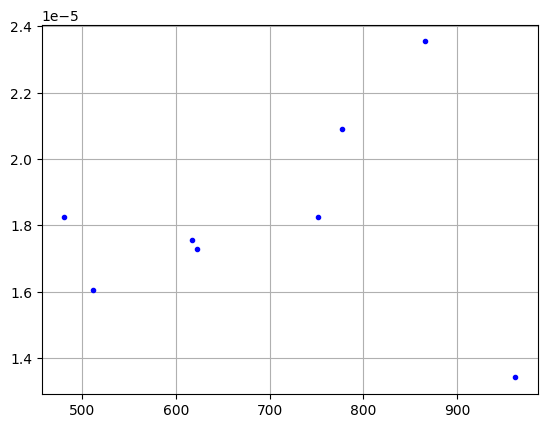

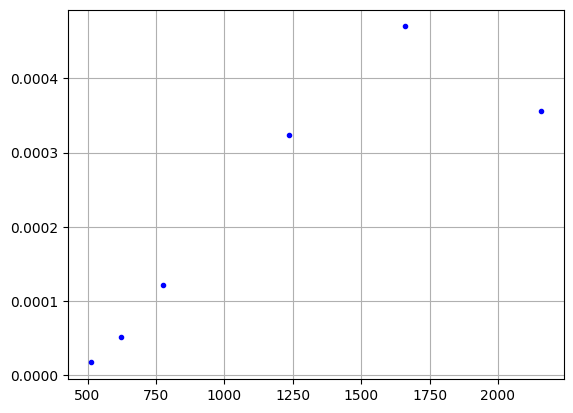

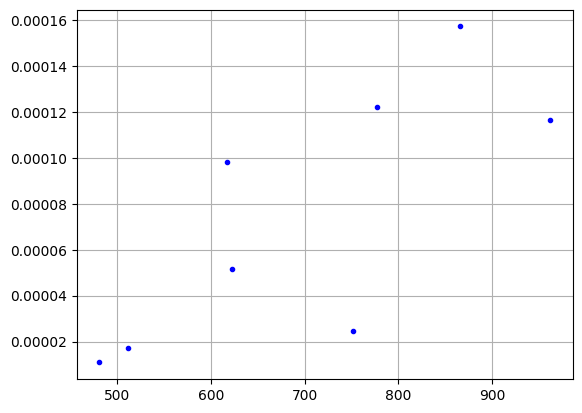

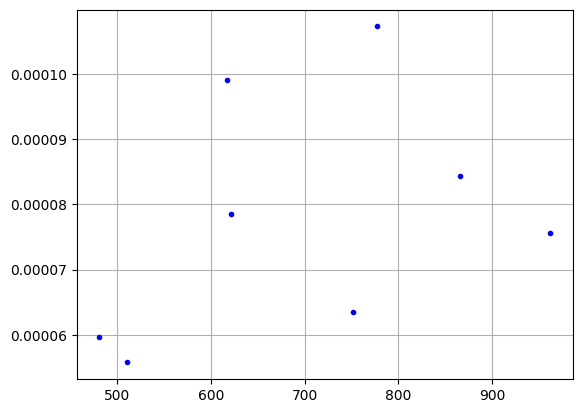

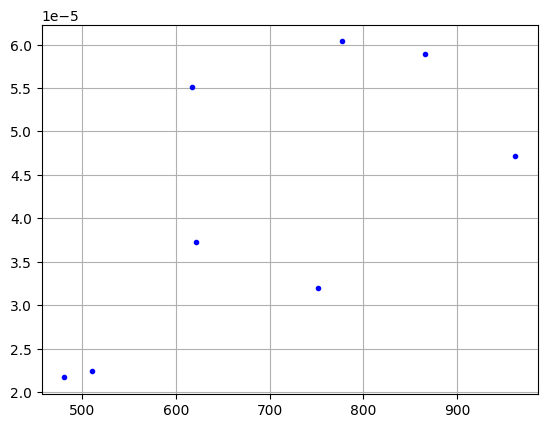

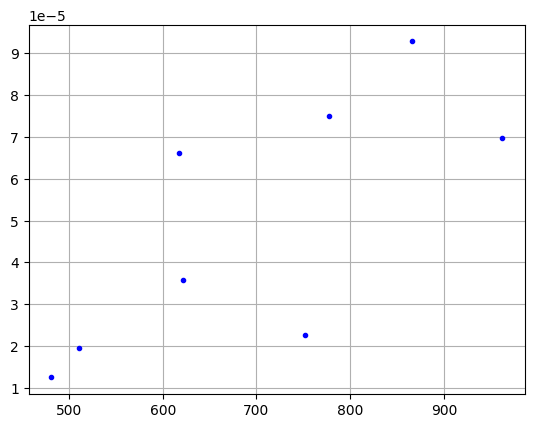

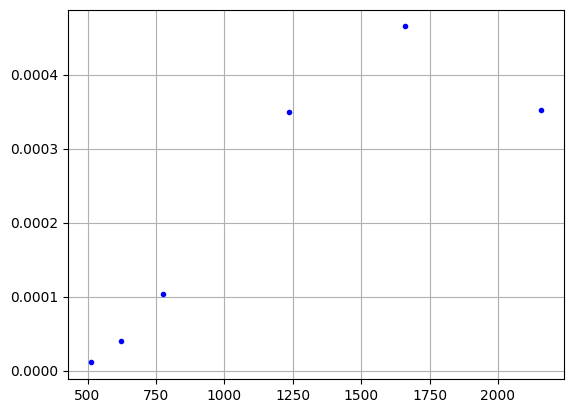

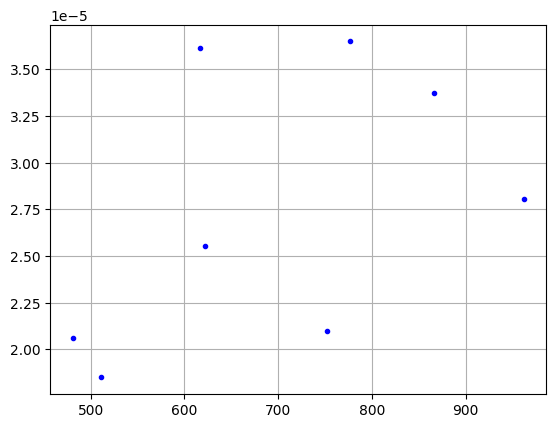

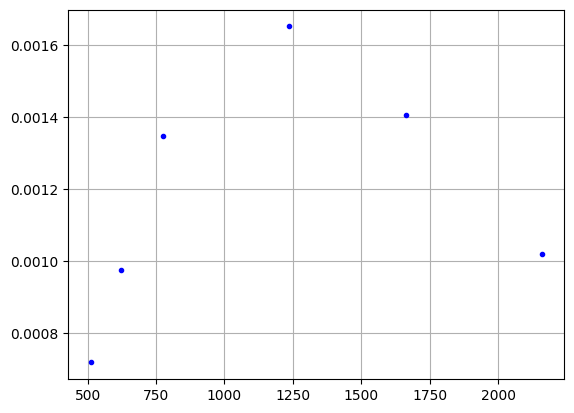

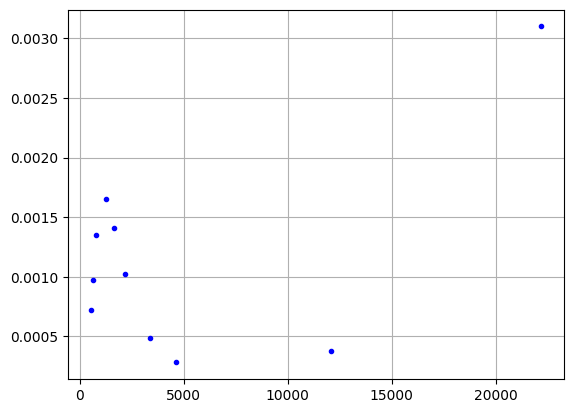

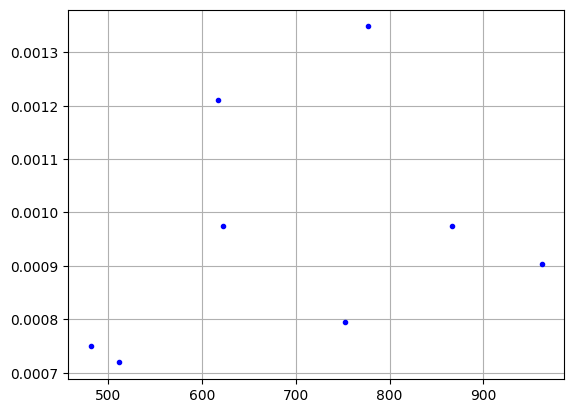

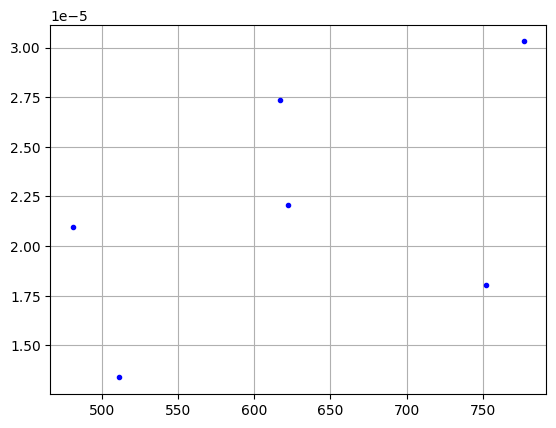

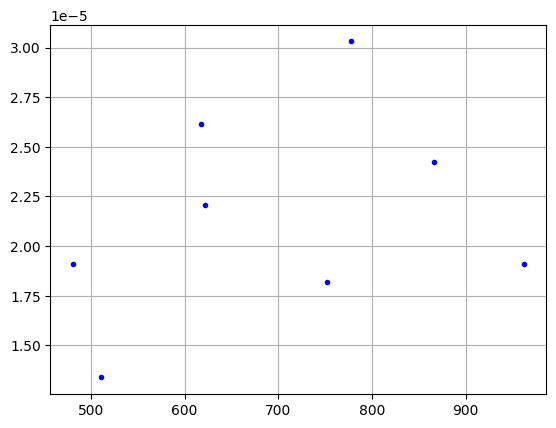

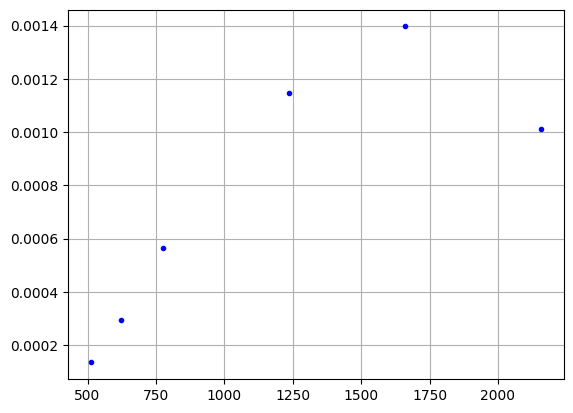

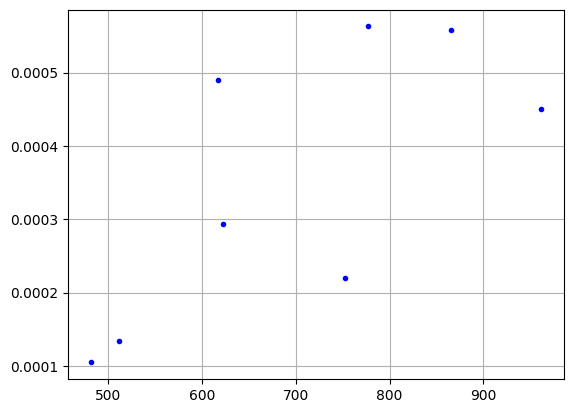

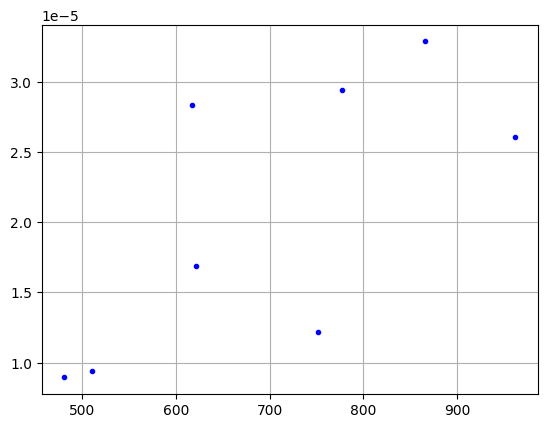

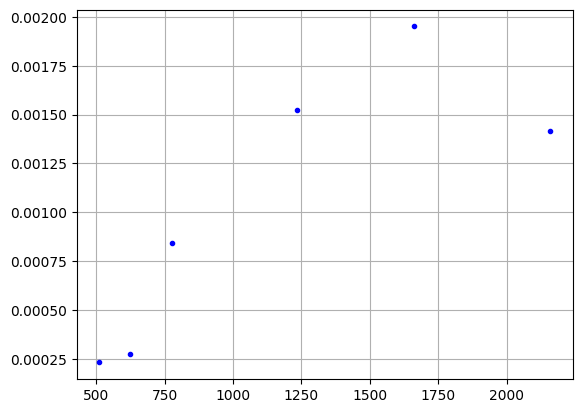

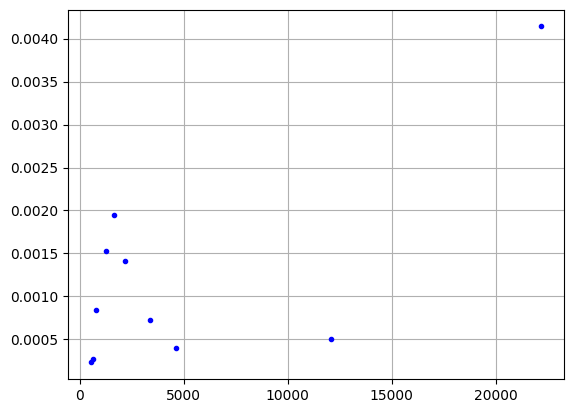

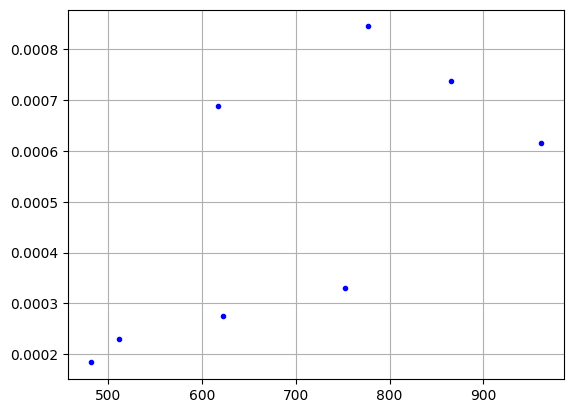

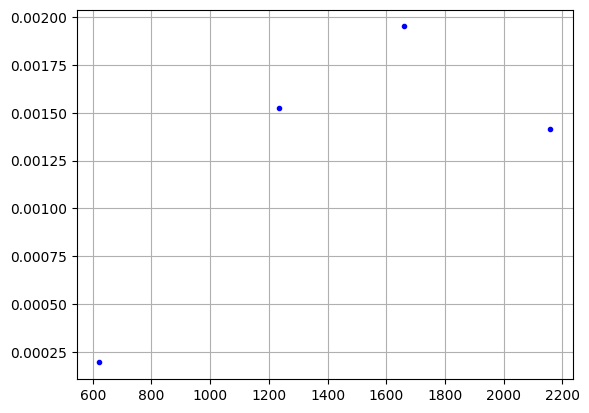

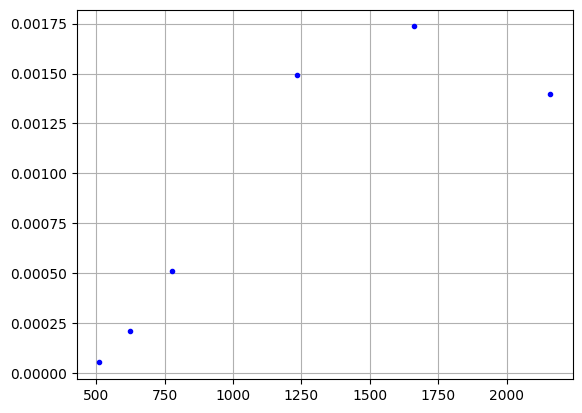

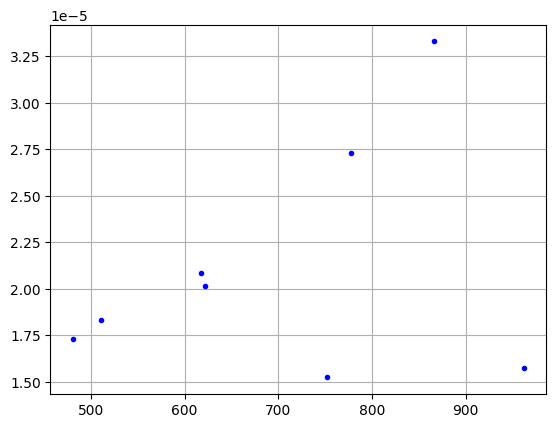

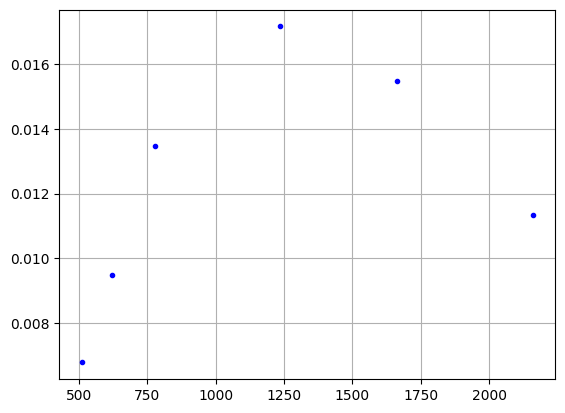

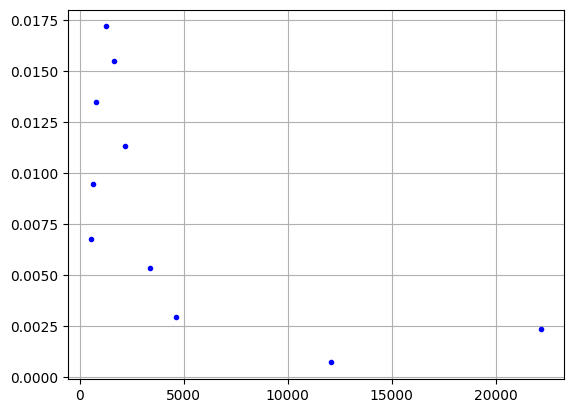

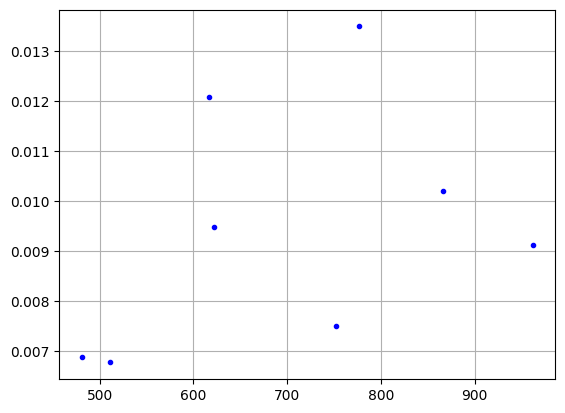

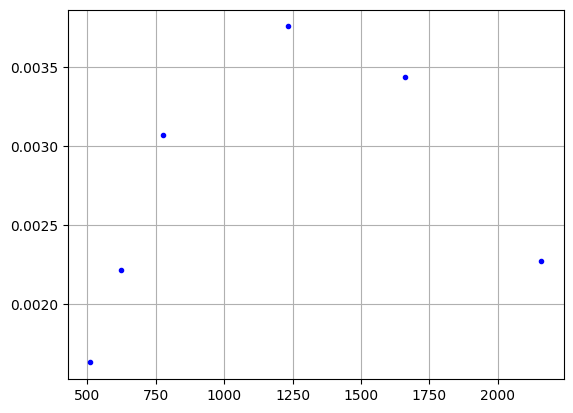

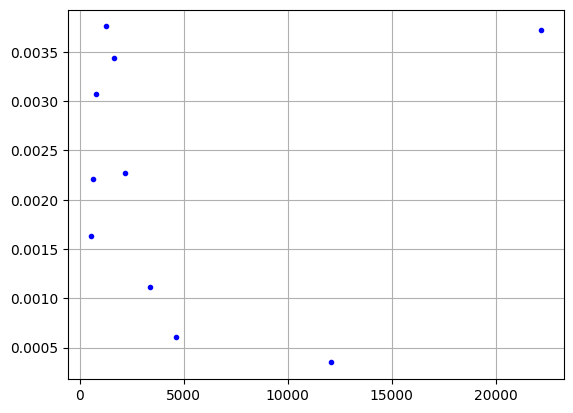

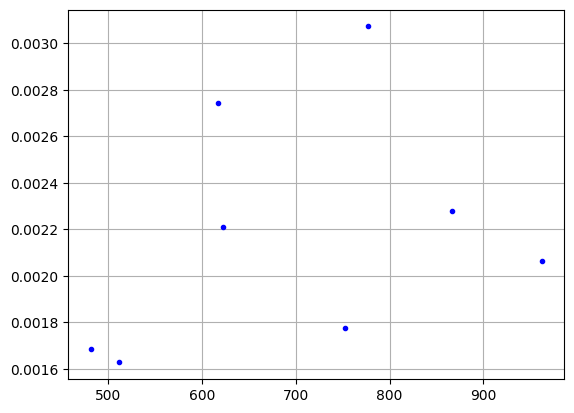

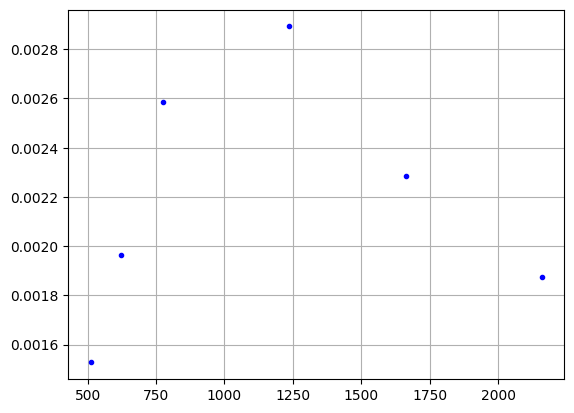

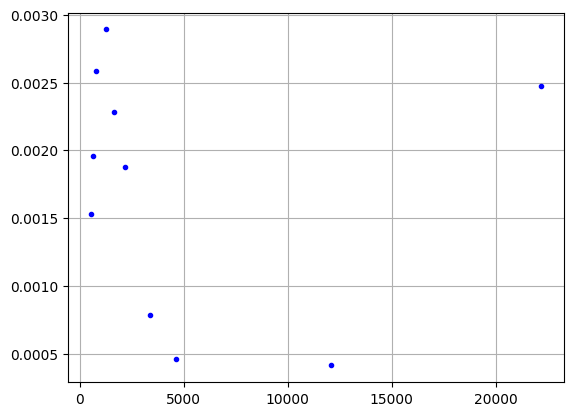

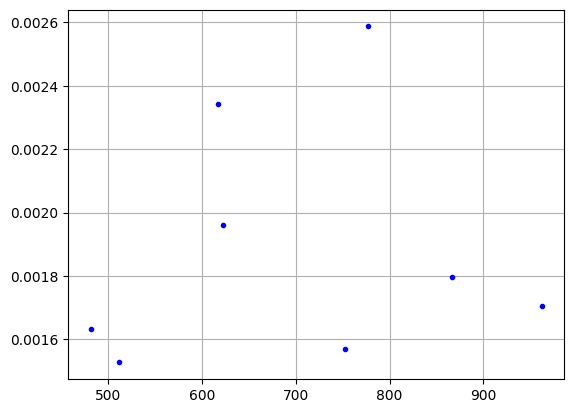

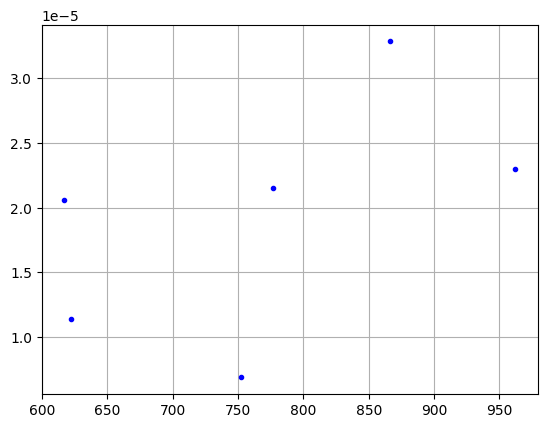

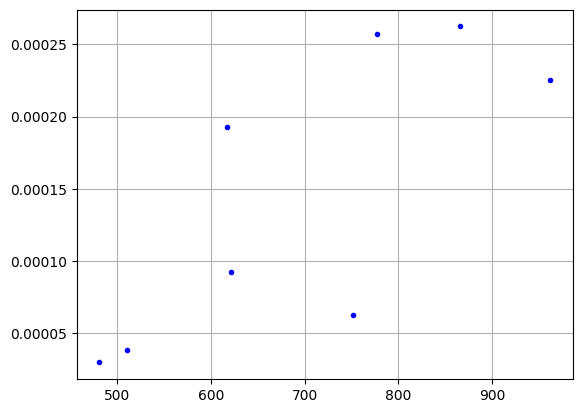

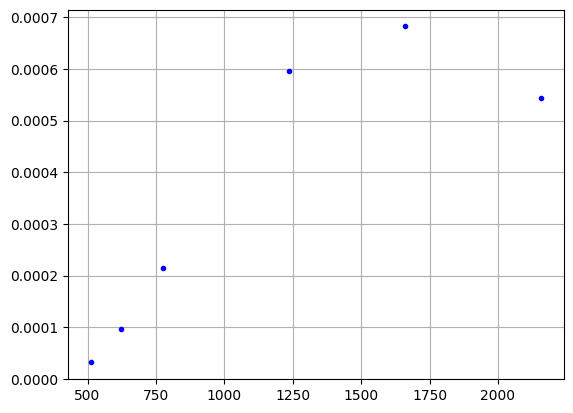

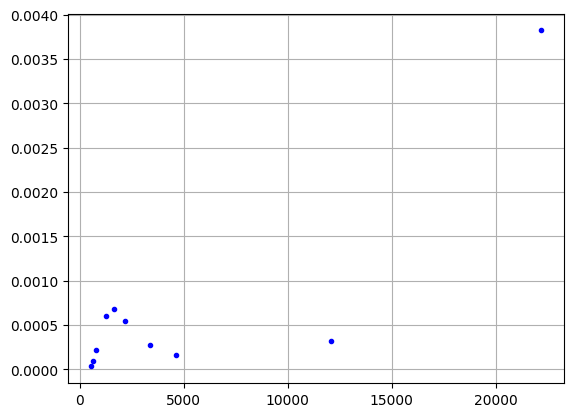

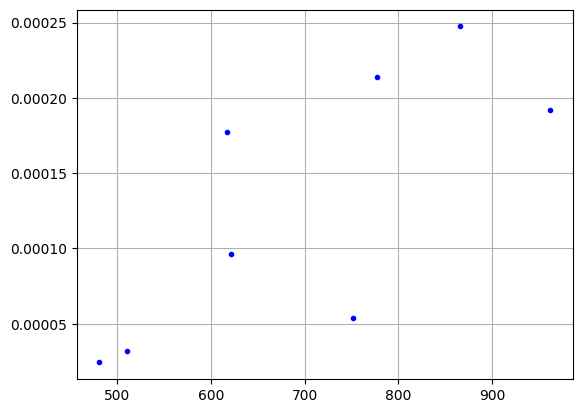

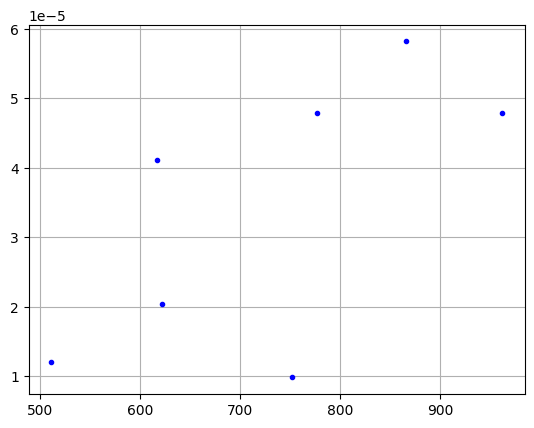

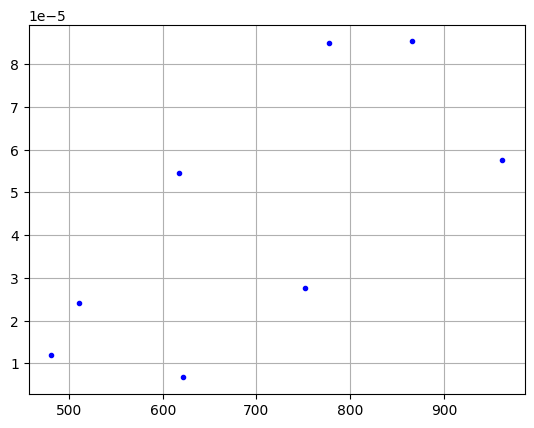

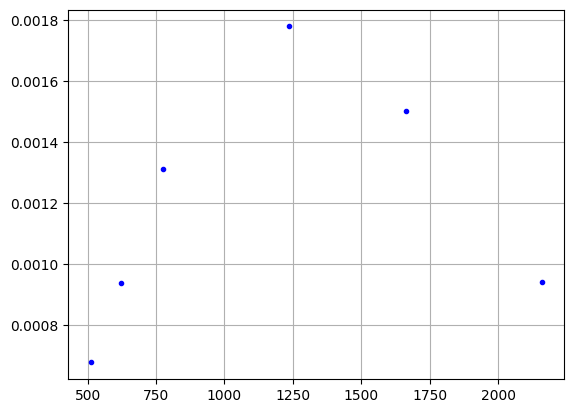

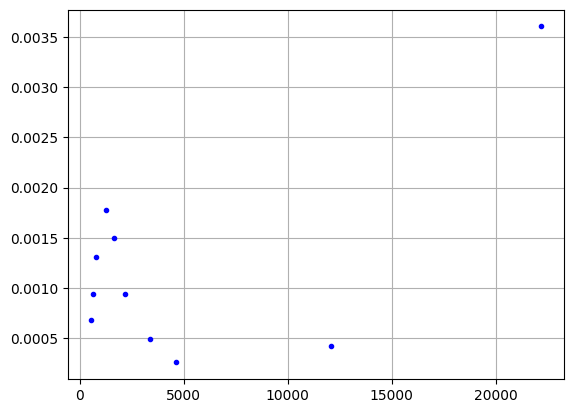

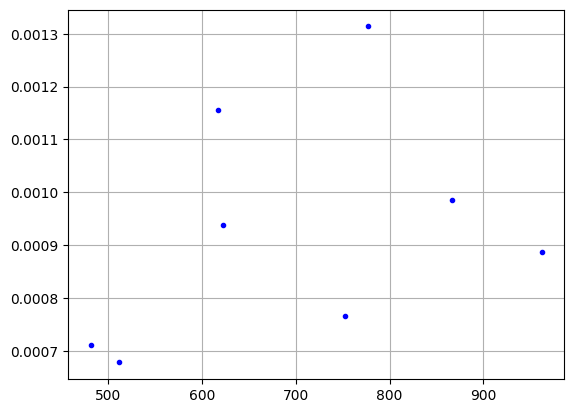

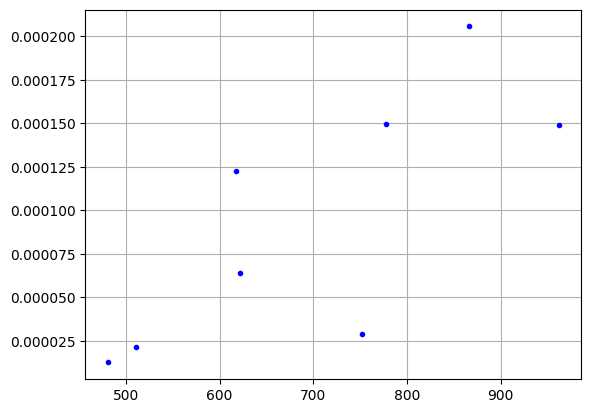

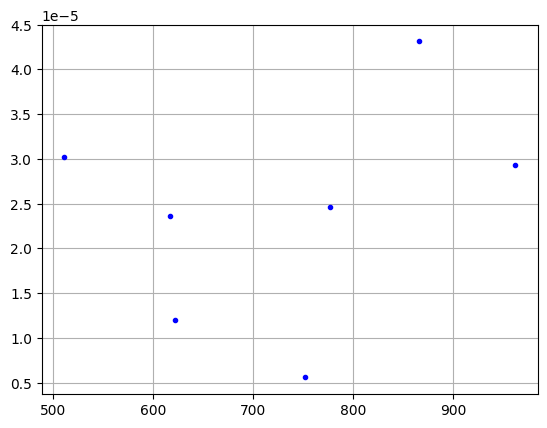

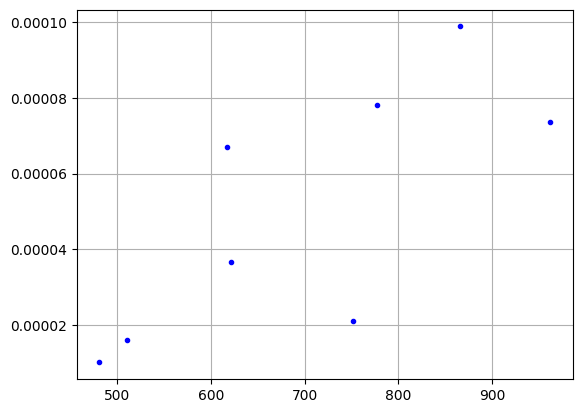

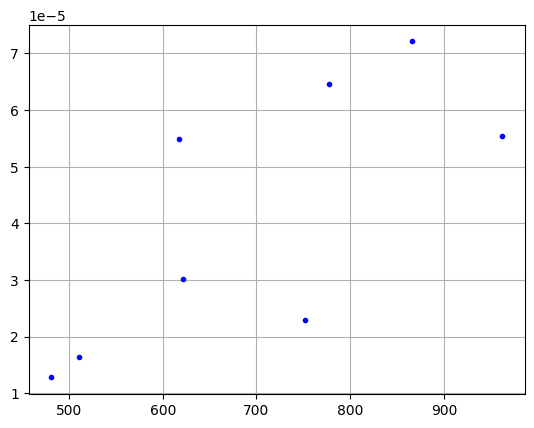

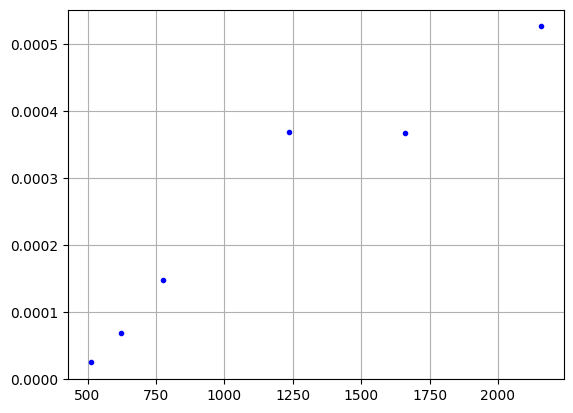

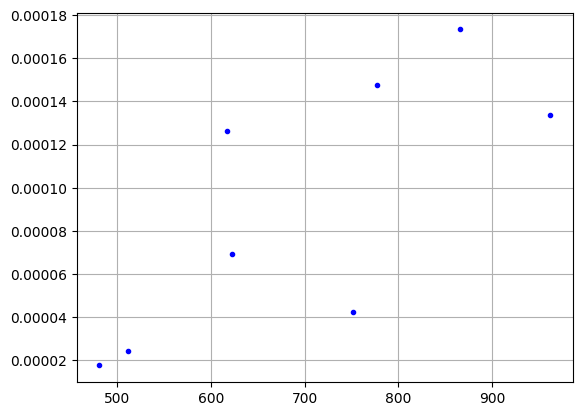

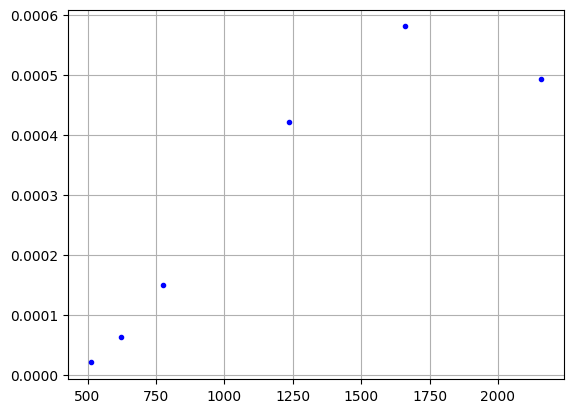

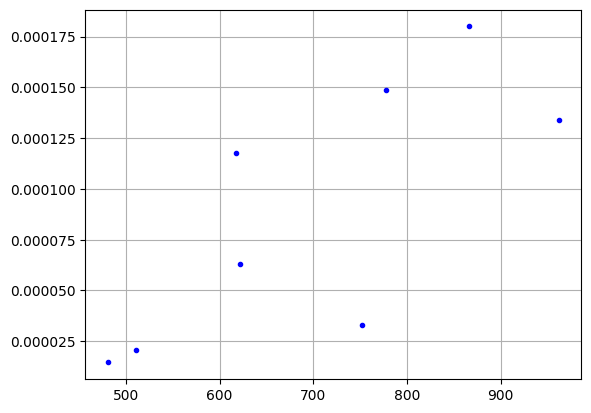

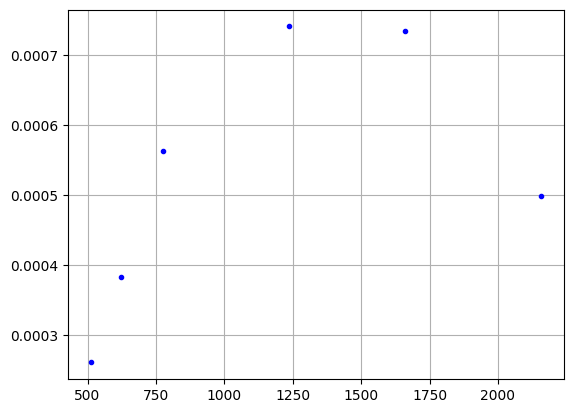

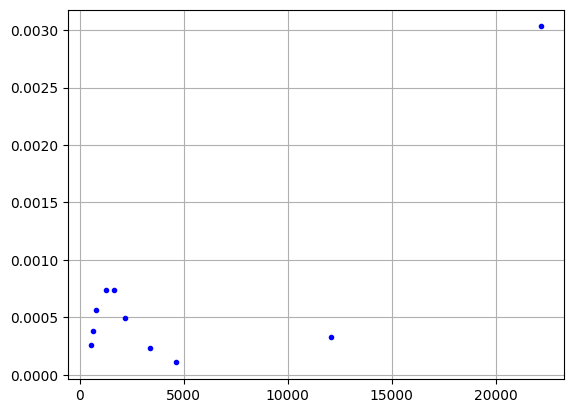

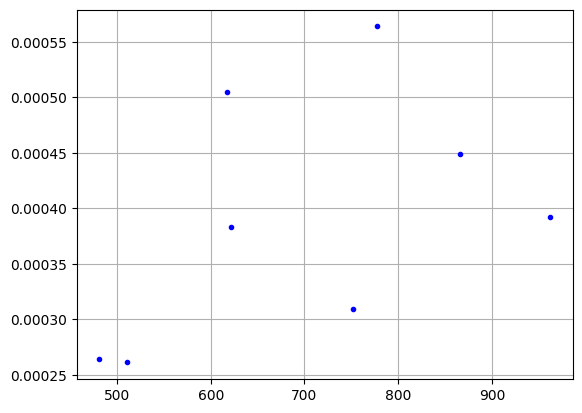

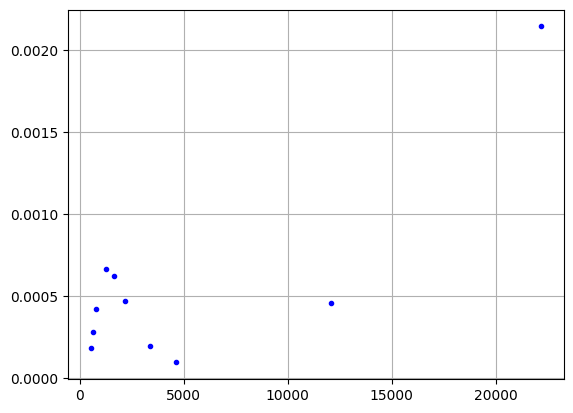

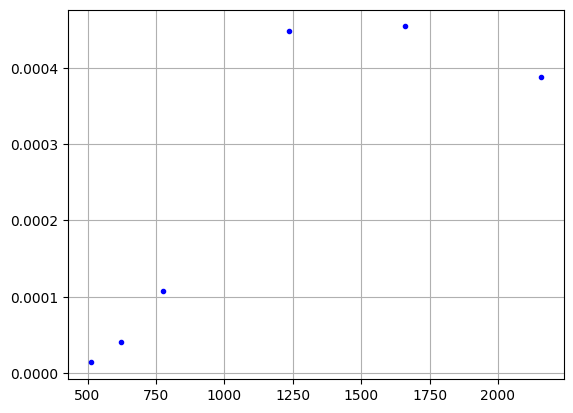

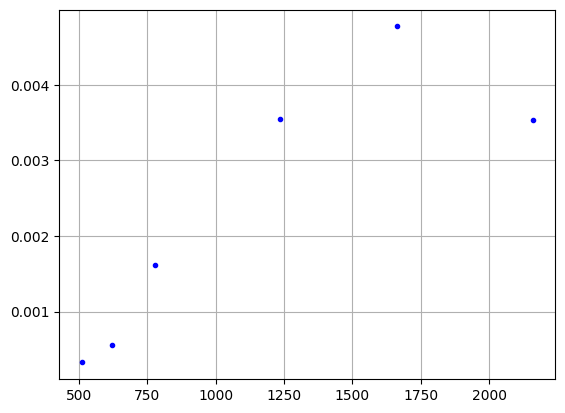

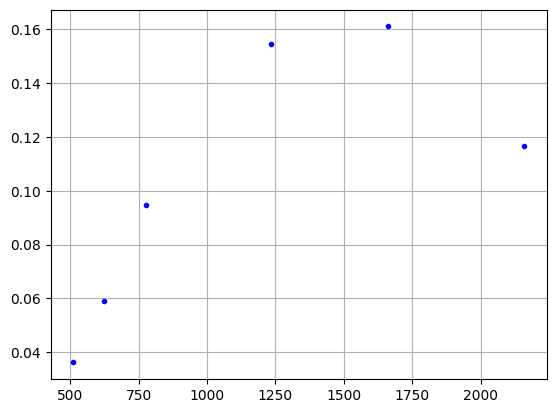

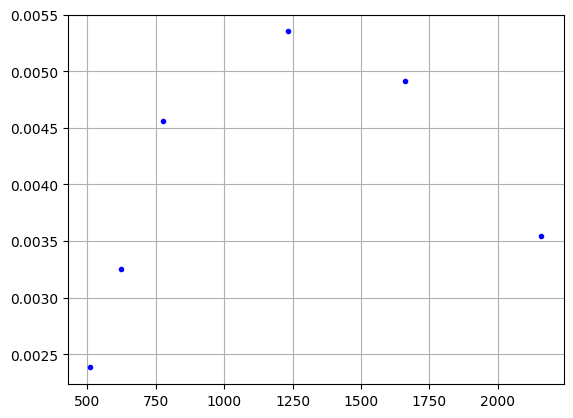

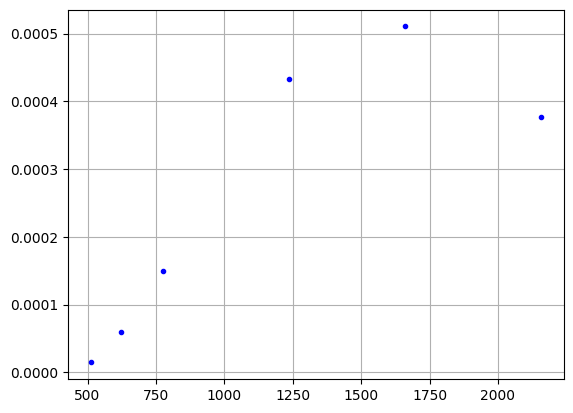

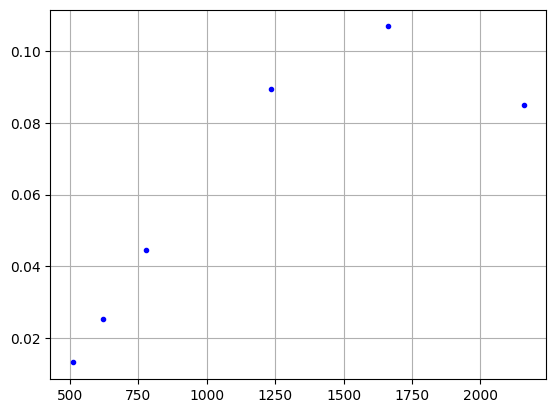

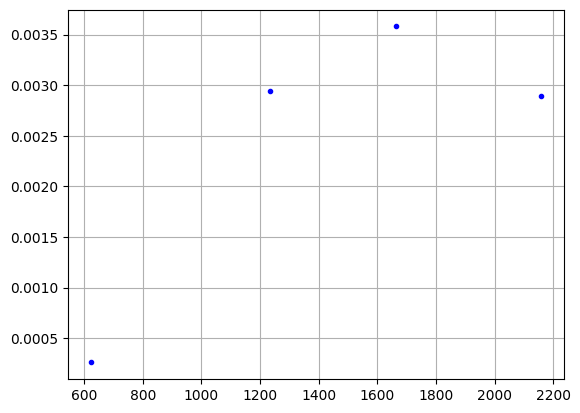

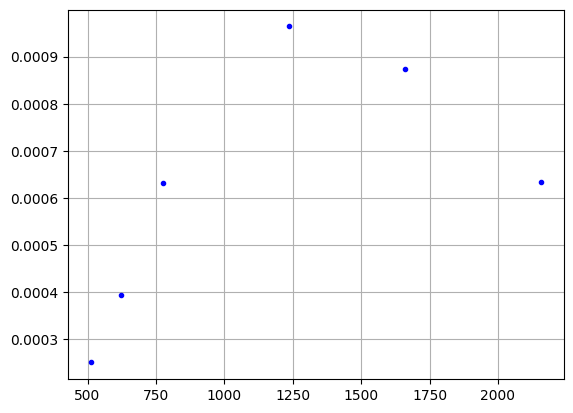

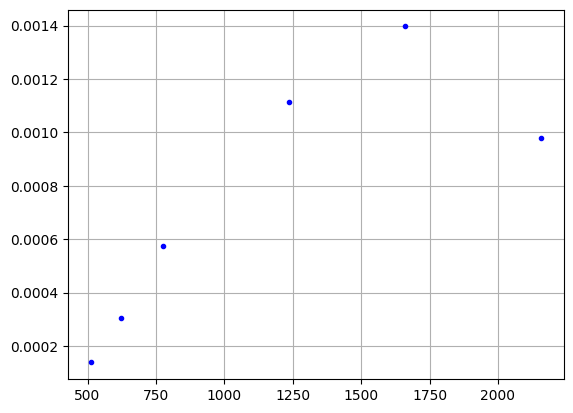

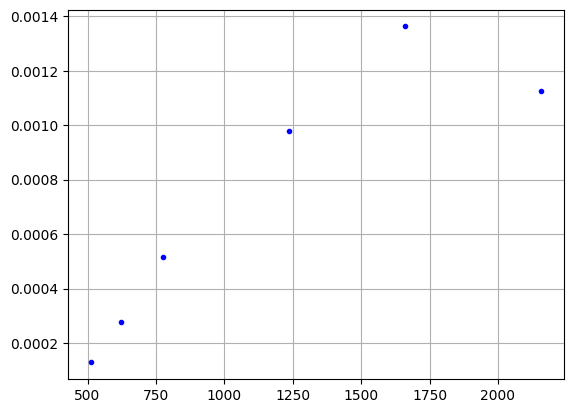

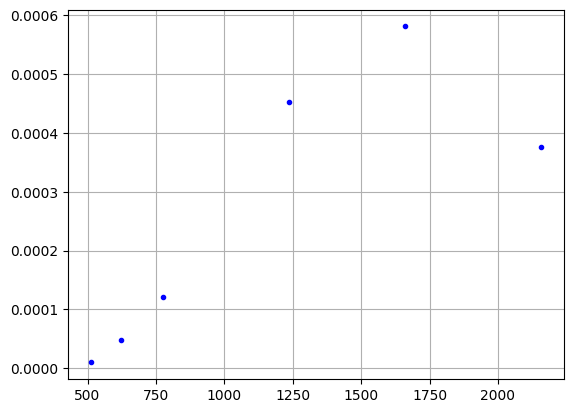

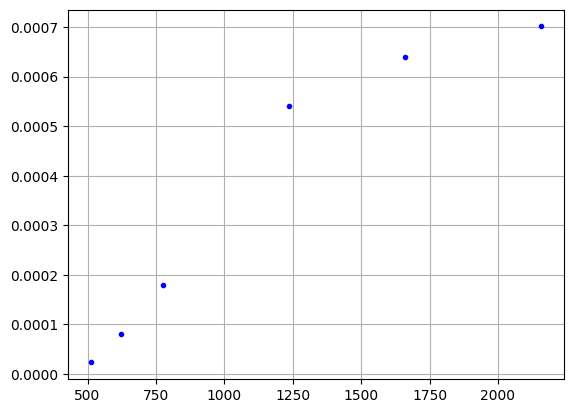

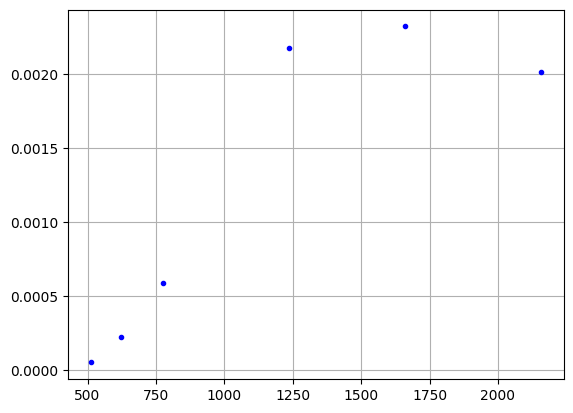

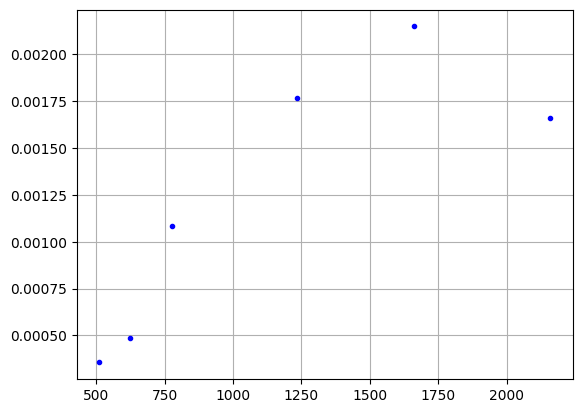

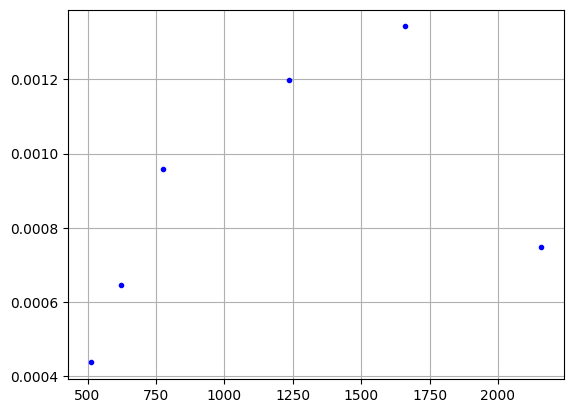

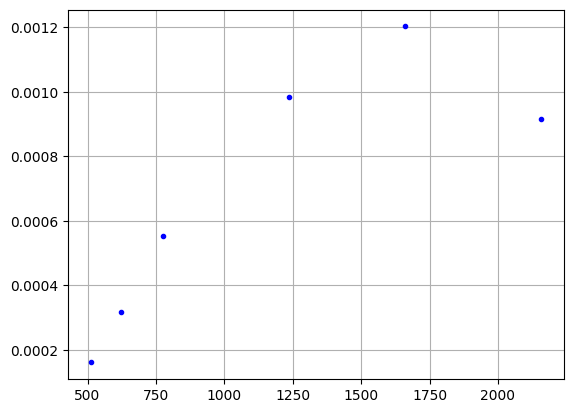

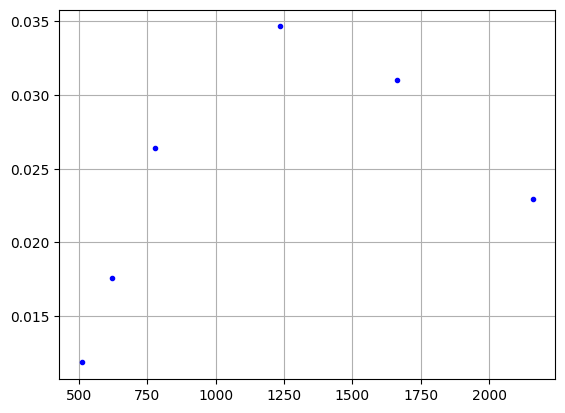

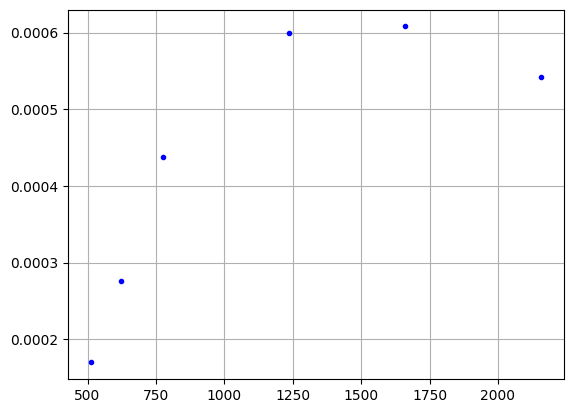

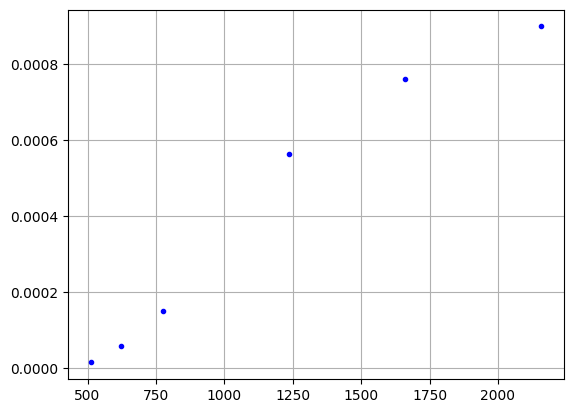

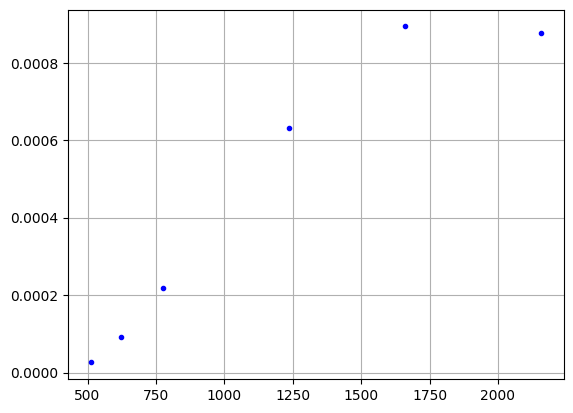

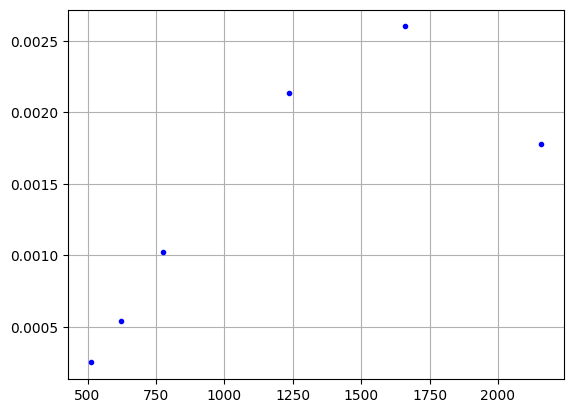

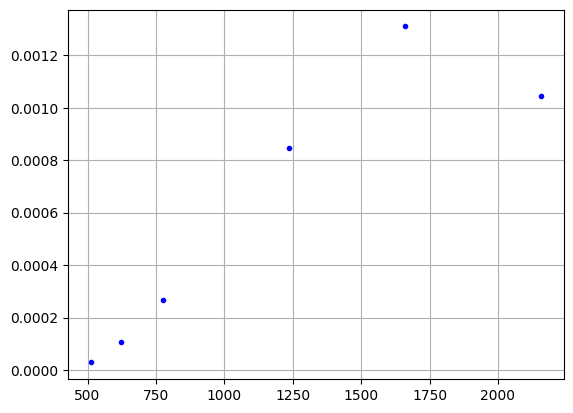

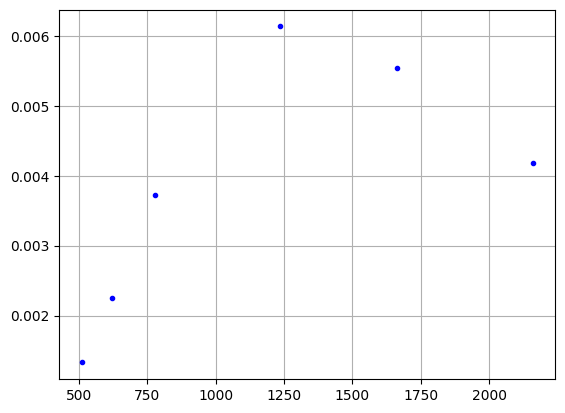

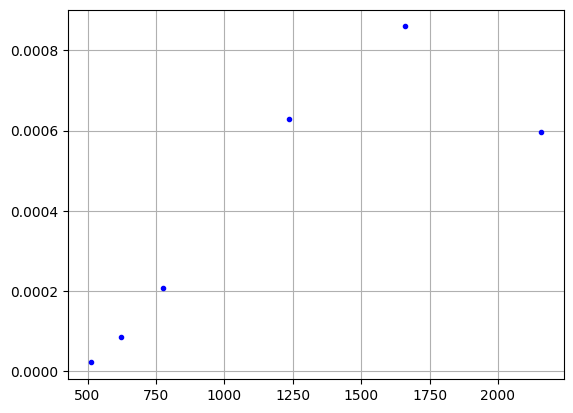

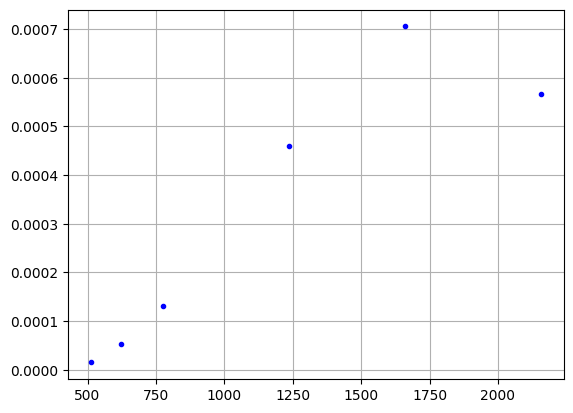

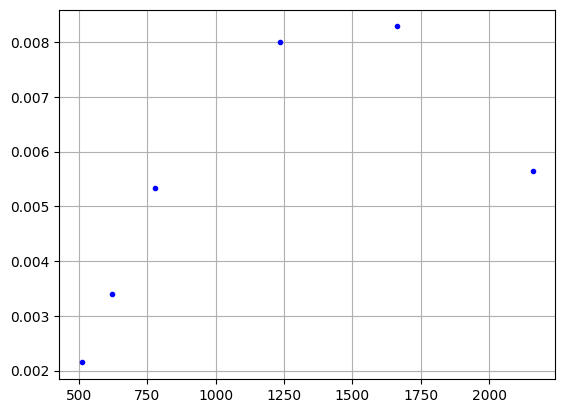

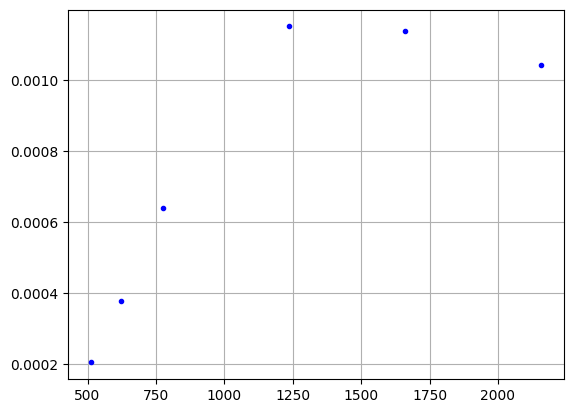

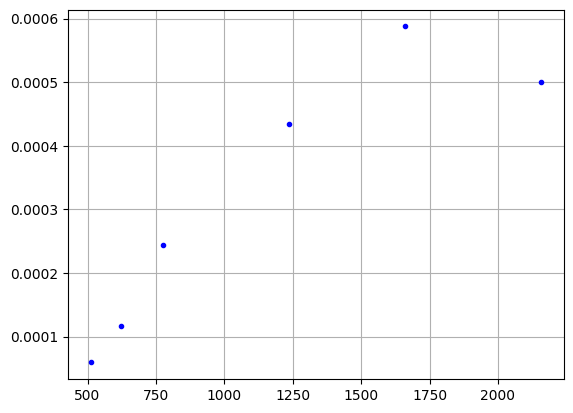

In [30]:
for row in result_cat:
    for i, mag in enumerate(mags):
        if not np.isnan(row[mag+'_Flux']):
            plt.errorbar(x=row[mag+'_WL'], y=row[mag+'_Flux'], yerr=0, fmt='b.')
    plt.grid()
    plt.show()
    # break

In [26]:
result_cat[mags[0]+'_WL'][0]

622.0